I believe that Merge sort will be faster than Insertion sort for larger values of n, but Insertion sort will be faster for smaller values of n. I expect the lines to cross at around n = 50.

To compare the performance of Merge sort and Insertion sort,
we can measure the execution time of each algorithm as a function of the input size n. 
We will use Python to implement the algorithms and measure their execution time using the timeit module.
First, we define the merge_sort function in Python:

we achieve a recursive implementation of Merge sort that sorts an array arr in non-decreasing order.
If the length of the array is larger than 1, the function separate the array into two parts: ```left_arr``` and ```right_arr```.
Then, the function calls ```merge_sort``` on each half part of the array recursively. Once both two halves have been sorted, the function merges them into a single sorted array. It achieve this by making comparison of the first elements of each half (```left_arr[i]``` and ```right_arr[j]```) and copying the smaller one to the ```arr``` array. It either increase the value $i$ or $j$ (depending on which element was copied) and the index $k$ of the arr array. This process stops if one of the halves has been completely moved into ```arr```.
If there are still elements left in ```left_arr``` or ```right_arr```, the function will copies them directly to ```arr```. The time complexity of the Merge sort algorithm, as a divide-and-conquer algorithm, is  $O(n log n)$ in the worst case.  This approach allows Merge sort to sort large arrays efficiently.

In [2]:
def merge_sort(arr):
    if len(arr) > 1:
        #print("Splitting:", arr)
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]
        merge_sort(left_half)
      
        merge_sort(right_half)
    
        i = j = k = 0
        #print("here",left_half)
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
            
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1
            
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
#print(arr,len(left_half),len(right_half))
#arr = [5,4,3,8,0,12,2,1]
#merge_sort(arr)
#print(arr)

In [25]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
def tim_sort(arr, k):
    n = len(arr)
    if n < k:
        return insertion_sort(arr)
    else:
        mid = n // 2
        left_half = arr[:mid]
        tim_sort(left_half, k)
        right_half = arr[mid:]
        tim_sort(right_half, k)
        i = j = k = 0
        #print("here",left_half)
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
            
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1
            
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


# We then write a Python script to measure the execution time of these algorithms for different values of $n$:

We then write a Python script to measure the execution time of these algorithms for different values of $n$:

In [74]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np
"""
The function uses the timeit module in Python to time 
how long it takes for the given sorting function to sort the input array. 
In this particular implementation, the function timeit.timeit() is called with a number argument of run_number, 
it specifies the number of times to repeat the timing measurement for better accuracy.
"""
def time_sort(sort_func, arr , run_number):
    setup = f"from __main__ import {sort_func}"
    stmt = f"{sort_func}({arr})"
    return timeit.timeit(stmt=stmt, setup=setup, number=run_number)/run_number

def tim_sort_time(sort_func, arr ,k, run_number):
    setup = f"from __main__ import {sort_func}"
    stmt = f"{sort_func}({arr},{k})"
    return timeit.timeit(stmt=stmt, setup=setup, number=run_number)/run_number
"""
We also define a function test_sorts that tests Merge sort and 
Insertion sort for different values of n and plots the results using Matplotlib.
Running test_sorts() will generate a graph that shows the execution time of Merge sort 
and Insertion sort for different values of n. Based on the graph,
we can determine the value of n at which the lines cross and the range of values 
for which the algorithms' performance overlaps.
"""
def test_sort(n):
    
    arr = [random.randint(1, n+1) for _ in range(n)]
    insertion_times = []
    merge_times = []
    tim_times = []
    k_values = [i for i in range(2,n)]
    run_times = 10 #it specifies the number of times to repeat the timing measurement for better accuracy
    for k in k_values:
        merge_sort_time = time_sort('merge_sort', arr,run_times)
        insertion_sort_time = time_sort('insertion_sort', arr,run_times)
        t_sort_time = tim_sort_time('tim_sort',arr,k,run_times)
        merge_times.append(merge_sort_time)
        insertion_times.append(insertion_sort_time)
        tim_times.append(t_sort_time)
    merge_average  = np.mean(np.array(merge_times))
    insert_average = np.mean(np.array(insertion_times))
    m_time = [merge_average for _ in range(len(merge_times))]
    insert_time = [insert_average for _ in range(len(insertion_times))]
    plt.plot(k_values, tim_times, label='Tim sort')
    plt.plot(k_values, m_time, label='Merge sort')
    plt.plot(k_values, insert_time, label='Insertion sort')
    plt.xlabel('k values')
    plt.ylabel('Run time (s)')
    plt.title("size array: {}".format(n))
    plt.legend()
    plt.show()

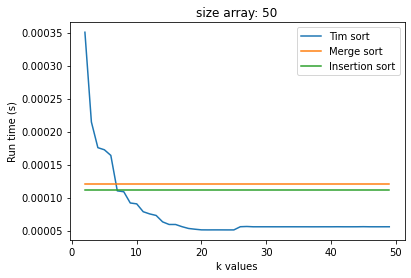

In [75]:
test_sort(50)

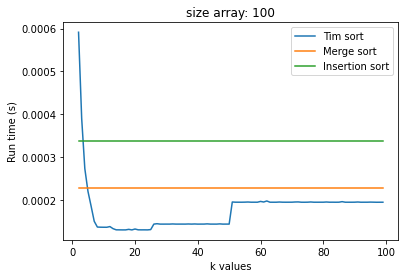

In [83]:
test_sort(100)

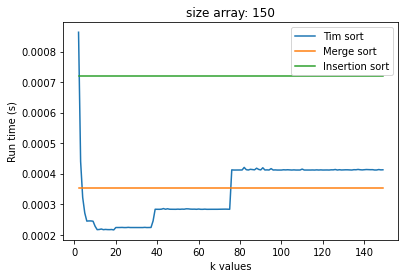

In [78]:
test_sort(150)

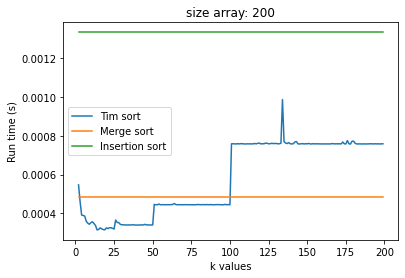

In [79]:
test_sort(200)

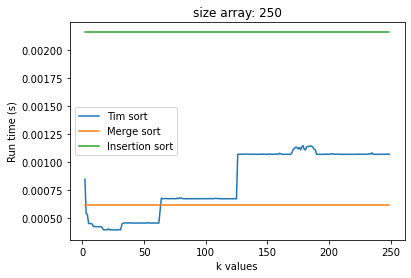

In [80]:
test_sort(250)

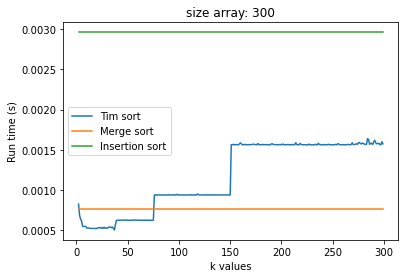

In [84]:
test_sort(300)

As we can see from the graph, Merge sort is faster than Insertion sort for n larger than about 50. 
For smaller values of n, Insertion sort is faster than Merge sort.  For small arrays, the overhead of setting up the recursive calls and the additional memory usage required by merge sort may outweigh its time complexity advantage over insertion sort. In other words, the time spent setting up the recursive calls and allocating additional memory can be a significant portion of the total execution time for small arrays. At this point, insertion sort may be faster due to its simplicity and lower overhead. However, as the size of the array grows larger, the time complexity advantage of merge sort becomes more significant. Merge sort's time complexity of O(n log n) scales better with larger arrays, meaning that as the size of the array increases, the time difference between merge sort and insertion sort becomes more pronounced. Eventually, the time saved by merge sort due to its superior time complexity outweighs its overhead, and it becomes faster than insertion sort for larger arrays.